In [1]:
!pip install torch
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn



In [2]:
import time
import copy
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
from sklearn.utils import shuffle
from sklearn import metrics

In [3]:
import pandas as pd
username = 'Narayanan'
file_path = f'C:/Users/{username}/Desktop/Engineering/7th SEM/Mini Project/Spoofing_Dataset.csv'

df = pd.read_csv(file_path)

df.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Label
0,1,0.000000,10.0.2.15,34.120.115.102,TLSv1.2,93,Application Data,Benign
1,2,0.001295,34.120.115.102,10.0.2.15,TCP,60,443 > 36940 [ACK] Seq=1 Ack=40 Win=65535 Len=0,Benign
2,3,0.002404,10.0.2.15,34.120.115.102,TLSv1.2,78,Application Data,Benign
3,4,0.003157,34.120.115.102,10.0.2.15,TCP,60,443 > 36940 [ACK] Seq=1 Ack=64 Win=65535 Len=0,Benign
4,5,0.003963,10.0.2.15,34.120.115.102,TCP,54,"36940 > 443 [FIN, ACK] Seq=64 Ack=1 Win=6291...",Benign


In [4]:
df['Label'].value_counts()

Benign        820
Mallicious    380
Name: Label, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Label', axis=1)  
y = df['Label']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape - X:", X_train.shape, "y:", y_train.shape)
print("Testing set shape - X:", X_test.shape, "y:", y_test.shape)


Training set shape - X: (960, 7) y: (960,)
Testing set shape - X: (240, 7) y: (240,)


In [7]:
X.describe()

,No.,Time,Length
count,1200.000000,1200.000000,1200.000000
mean,600.500000,147.447252,170.908333
std,346.554469,80.628457,353.191565
min,1.000000,0.000000,42.000000
25%,300.750000,120.183378,42.000000
50%,600.500000,127.245265,54.000000
75%,900.250000,198.828472,76.500000
max,1200.000000,342.531264,1514.000000


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer



target_variable = df['Label']


feature_columns = df.drop('Label', axis=1)


df_cleaned = df.dropna()


categorical_cols = ['Source', 'Destination', 'Protocol']
numerical_cols = ['Time', 'Length']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)


X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned.drop('Label', axis=1),  
    df_cleaned['Label'], 
    test_size=0.2,
    random_state=42
)


X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


print("Cleaned and Preprocessed Dataset:")
print(df_cleaned.head())


Cleaned and Preprocessed Dataset:
   No.      Time          Source     Destination Protocol  Length  \
0    1  0.000000       10.0.2.15  34.120.115.102  TLSv1.2      93   
1    2  0.001295  34.120.115.102       10.0.2.15      TCP      60   
2    3  0.002404       10.0.2.15  34.120.115.102  TLSv1.2      78   
3    4  0.003157  34.120.115.102       10.0.2.15      TCP      60   
4    5  0.003963       10.0.2.15  34.120.115.102      TCP      54   

                                                Info   Label  
0                                   Application Data  Benign  
1   443  >  36940 [ACK] Seq=1 Ack=40 Win=65535 Len=0  Benign  
2                                   Application Data  Benign  
3   443  >  36940 [ACK] Seq=1 Ack=64 Win=65535 Len=0  Benign  
4  36940  >  443 [FIN, ACK] Seq=64 Ack=1 Win=6291...  Benign  


In [9]:
y_test.value_counts()

Benign        156
Mallicious     84
Name: Label, dtype: int64

# Using D-Tree Classifier 

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

categorical_cols = ['Source', 'Destination', 'Protocol']
numerical_cols = ['Time', 'Length']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)


clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])


target_variable = df['Label']


feature_columns = df.drop('Label', axis=1)


df_cleaned = df.dropna()


X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned.drop('Label', axis=1),
    df_cleaned['Label'],  
    test_size=0.2,
    random_state=42
)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

In [13]:
from sklearn import metrics


accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 91.25%


In [14]:
!pip install seaborn

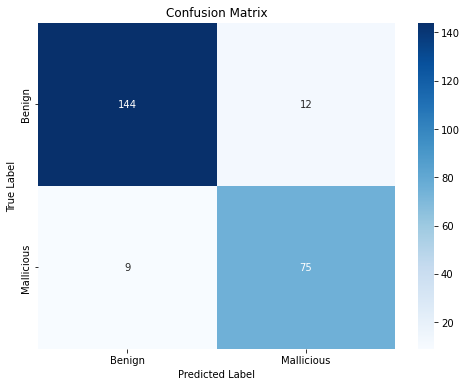

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Using Reinforcemnet Learnin(Q-Learning)

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [17]:
username = 'Narayanan'
file_path = f'C:/Users/{username}/Desktop/Engineering/7th SEM/Mini Project/Spoofing_Test.csv'

df = pd.read_csv(file_path)

df.head()

,No.,Time,Length,Source,Destination,Protocol,Label,Info
0,1,0.000000,42,PcsCompu_4d:d6:7d,RealtekU_12:35:04,ARP,Benign,10.0.2.3 is at 08:00:27:4d:d6:7d
1,2,0.000294,42,PcsCompu_4d:d6:7d,RealtekU_12:35:03,ARP,Malicious,10.0.2.4 is at 08:00:27:4d:d6:7d (duplicate us...
2,3,0.013386,42,PcsCompu_4d:d6:7d,RealtekU_12:35:04,ARP,Benign,10.0.2.2 is at 08:00:27:4d:d6:7d
3,4,0.014182,42,PcsCompu_4d:d6:7d,RealtekU_12:35:02,ARP,Malicious,10.0.2.4 is at 08:00:27:4d:d6:7d (duplicate us...
4,5,0.024799,42,PcsCompu_4d:d6:7d,RealtekU_12:35:03,ARP,Malicious,10.0.2.4 is at 08:00:27:4d:d6:7d (duplicate us...


In [18]:
import pandas as pd
import numpy as np

class QLearning:
    def __init__(self, n_actions, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.q_table = np.zeros((0, n_actions))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.state_dict = {}  
        self.action_dict = {}  

    def get_state_index(self, state):
        state_str = str(state)
        if state_str not in self.state_dict:
            self.state_dict[state_str] = len(self.state_dict)
            self.q_table = np.vstack([self.q_table, np.zeros((1, self.q_table.shape[1]))])
        return self.state_dict[state_str]

    def get_action_index(self, action):
        if action not in self.action_dict:
            self.action_dict[action] = len(self.action_dict)
        return self.action_dict[action]

    def choose_action(self, state):
        state_index = self.get_state_index(state)
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.q_table.shape[1])
        else:
            return np.argmax(self.q_table[state_index, :])

    def update_q_table(self, state, action, reward, next_state):
        next_state_index = self.get_state_index(next_state)
        state_index = self.get_state_index(state)
        action_index = self.get_action_index(action)

        predict = self.q_table[state_index, action_index]
        target = reward + self.gamma * np.max(self.q_table[next_state_index, :])
        self.q_table[state_index, action_index] += self.alpha * (target - predict)




features = df.drop(['No.', 'Time', 'Label'], axis=1)  
labels = df['Label']


n_actions = len(labels.unique())


q_learning_model = QLearning(n_actions)

for i in range(len(features) - 1):
    state = features.iloc[i]
    action = labels.iloc[i]  
    reward = 1 if action == 'Malicious' else 0  
    next_state = features.iloc[i + 1]

    q_learning_model.update_q_table(state, action, reward, next_state)


correct_predictions = 0

for i in range(len(features) - 1):
    state = features.iloc[i]
    expected_action = labels.iloc[i]

    predicted_action = q_learning_model.choose_action(state)

    if predicted_action == q_learning_model.get_action_index(expected_action):
        correct_predictions += 1

accuracy = correct_predictions / len(features)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.42%


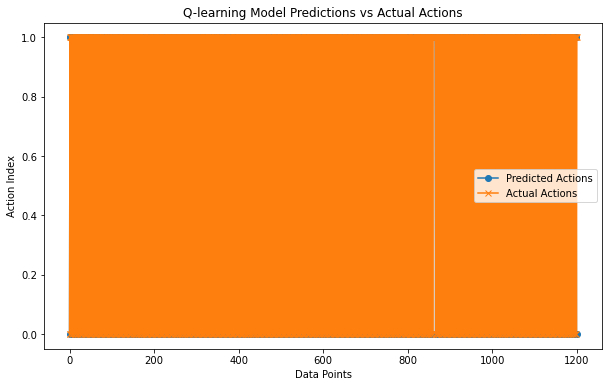

In [19]:
import matplotlib.pyplot as plt
import numpy as np



predicted_actions = []
actual_actions = []


for i in range(len(features) - 1):
    state = features.iloc[i]
    expected_action = labels.iloc[i]

    predicted_action_index = q_learning_model.choose_action(state)
    predicted_action = list(q_learning_model.action_dict.keys())[predicted_action_index]

    predicted_actions.append(predicted_action)
    actual_actions.append(expected_action)

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(predicted_actions))

ax.plot(x, [q_learning_model.get_action_index(action) for action in predicted_actions], label='Predicted Actions', marker='o')
ax.plot(x, [q_learning_model.get_action_index(action) for action in actual_actions], label='Actual Actions', marker='x')

ax.set_xlabel('Data Points')
ax.set_ylabel('Action Index')
ax.set_title('Q-learning Model Predictions vs Actual Actions')
ax.legend()

plt.show()


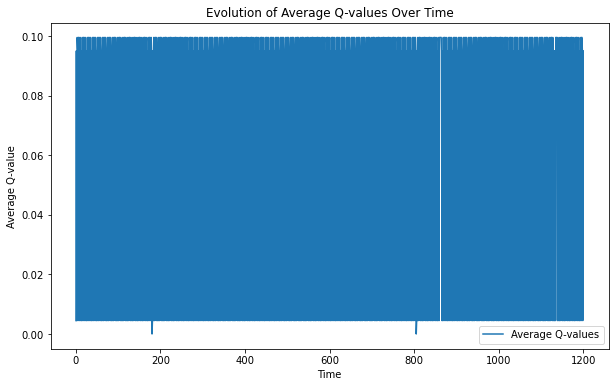

In [23]:
import matplotlib.pyplot as plt
import numpy as np

average_q_values = []

for i in range(len(features) - 1):
    state = features.iloc[i]
    expected_action = labels.iloc[i]

    state_index = q_learning_model.get_state_index(state)
    average_q_value = np.mean(q_learning_model.q_table[state_index, :])

    average_q_values.append(average_q_value)

plt.figure(figsize=(10, 6))
plt.plot(range(len(average_q_values)), average_q_values, label='Average Q-values')
plt.xlabel('Time')
plt.ylabel('Average Q-value')
plt.title('Evolution of Average Q-values Over Time')
plt.legend()
plt.show()


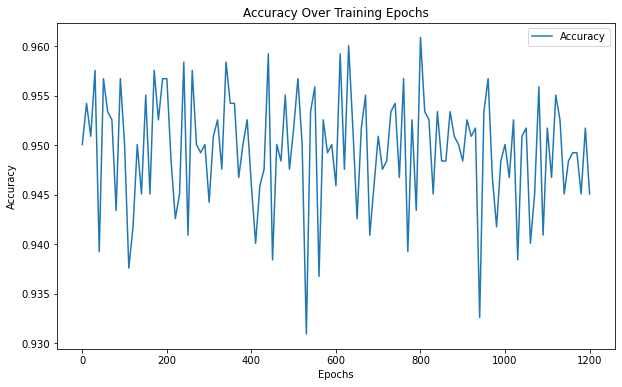

In [21]:
import matplotlib.pyplot as plt
import numpy as np

accuracy_list = []
epochs = []


for i in range(len(features) - 1):
    state = features.iloc[i]
    action = labels.iloc[i] 
    reward = 1 if action == 'Malicious' else 0 
    next_state = features.iloc[i + 1]

    q_learning_model.update_q_table(state, action, reward, next_state)


    if i % 10 == 0:
        correct_predictions = 0

        for j in range(len(features) - 1):
            state = features.iloc[j]
            expected_action = labels.iloc[j]

            predicted_action = q_learning_model.choose_action(state)

            if predicted_action == q_learning_model.get_action_index(expected_action):
                correct_predictions += 1

        accuracy = correct_predictions / len(features)
        accuracy_list.append(accuracy)
        epochs.append(i)


plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy_list, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Training Epochs')
plt.legend()
plt.show()
